In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotnine as pn

In [2]:
df=pd.read_csv("C:/Users/RESAF/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.drop(['EmployeeCount','EmployeeNumber'], axis = 'columns',inplace = True)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
df.drop('Over18', axis = 'columns', inplace = True)

In [5]:
df['Attrition'] = df['Attrition'].replace({'Yes': 1, 'No': 0})
df['OverTime'] = df['OverTime'].replace({'Yes': 1, 'No': 0})

In [6]:
df1 = pd.get_dummies(data=df, columns = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus'])
df1.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'JobRole_Health

In [7]:
cols_to_scale = ['Age', 'DailyRate', 'DistanceFromHome','Education','EnvironmentSatisfaction',
                 'HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome',
                 'NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction',
                 'StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance',
                'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [8]:
df1.sample(10)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
893,0.261905,0,0.649964,0.000000,0.50,0.000000,0.957143,0.666667,0.00,1.000000,...,0,0,0,0,1,0,0,1,0,0
1286,0.523810,0,0.367931,0.035714,0.25,0.666667,0.985714,0.666667,0.00,0.000000,...,1,0,0,0,0,0,0,0,1,0
1457,0.523810,0,0.781675,0.035714,0.75,0.666667,0.971429,0.666667,0.00,0.666667,...,0,0,0,0,1,0,0,0,1,0
1445,0.547619,0,0.343593,0.964286,0.75,0.000000,0.428571,0.333333,0.75,0.333333,...,0,0,1,0,0,0,0,0,1,0
579,0.380952,0,0.013601,0.035714,0.75,0.666667,0.800000,0.333333,0.00,0.000000,...,0,0,0,0,1,0,0,0,0,1
6,0.976190,0,0.874732,0.071429,0.50,0.666667,0.728571,1.000000,0.00,0.000000,...,1,0,0,0,0,0,0,0,1,0
1225,0.642857,0,0.646385,0.964286,0.25,1.000000,0.257143,0.333333,0.75,0.333333,...,0,0,0,1,0,0,0,0,0,1
1170,0.214286,0,0.350036,0.035714,0.50,1.000000,0.814286,0.666667,0.00,1.000000,...,0,0,0,0,1,0,0,0,0,1
842,0.238095,1,0.989979,0.392857,0.00,0.666667,0.700000,0.666667,0.00,1.000000,...,1,0,0,0,0,0,0,0,1,0
1385,0.380952,0,0.813887,0.428571,0.75,1.000000,0.128571,0.666667,0.50,0.666667,...,0,0,0,0,0,1,0,1,0,0


In [9]:
x= df1.drop('Attrition', axis = 'columns')
y= df1.Attrition.astype(np.float32)

In [10]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x, y)

y_sm.value_counts()

1.0    1233
0.0    1233
Name: Attrition, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [12]:
y_train.value_counts()

1.0    986
0.0    986
Name: Attrition, dtype: int64

# LOGISTIC REGRESSION

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [16]:
model = LogisticRegression()

# Fit the model on the training data
model.fit(x_sm, y_sm)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7267206477732794
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.68      0.86      0.76       247
         1.0       0.81      0.60      0.69       247

    accuracy                           0.73       494
   macro avg       0.74      0.73      0.72       494
weighted avg       0.74      0.73      0.72       494



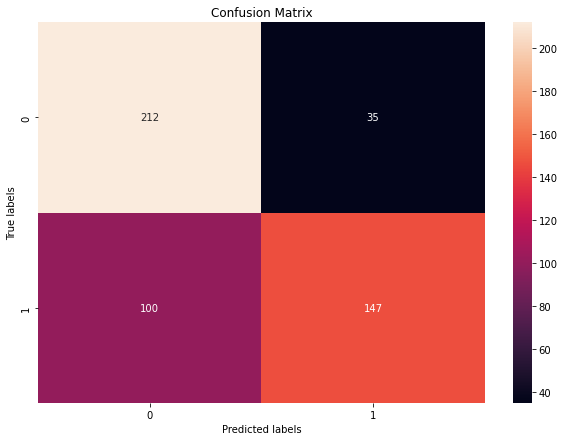

In [17]:
cm = confusion_matrix(y_test, y_preds)
import seaborn as sns

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d")

plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")

plt.show()

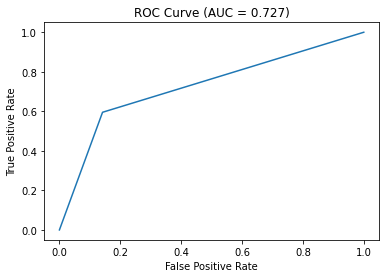

In [18]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_preds)
auc = roc_auc_score(y_test, y_preds)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.3f})'.format(auc))
plt.show()

# ---------------------------------------------------------------------------------------------------------------
# KNN CLASSIFICATION

N = 3

In [33]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
model = KNeighborsClassifier(n_neighbors=3)

# Fit the model on the training data
model.fit(x_sm, y_sm)

# Make predictions on the test data
y_pred = model.predict(x_test)
y_pred = np.round(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7894736842105263


In [30]:
print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.79      0.78      0.79       247
         1.0       0.78      0.80      0.79       247

    accuracy                           0.79       494
   macro avg       0.79      0.79      0.79       494
weighted avg       0.79      0.79      0.79       494



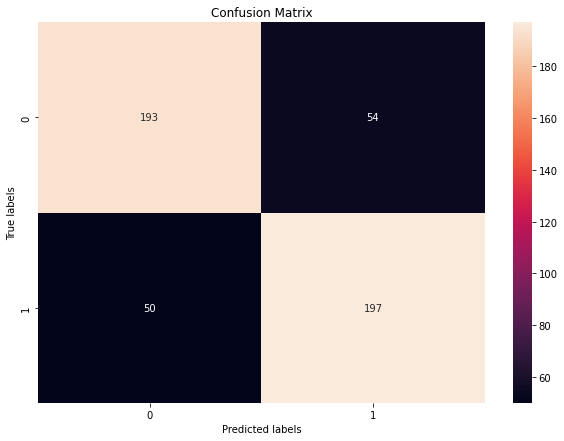

In [31]:
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d")

plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")

plt.show()

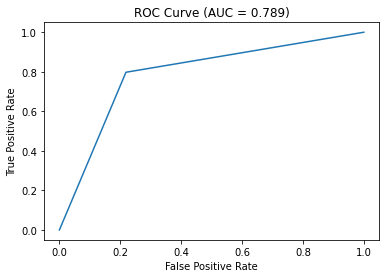

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.3f})'.format(auc))
plt.show()

# ---------------------------------------------------------------------------------------------------------------
# NAIVE BAYES 

In [66]:
from sklearn.naive_bayes import GaussianNB
# create a Gaussian Naive Bayes classifier object
gnb = GaussianNB()

# train the model using the training data
gnb.fit(x_sm, y_sm)

# predict the labels of the test data
y_pred = gnb.predict(x_test)

# evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.7793522267206477


In [39]:
print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.92      0.62      0.74       247
         1.0       0.71      0.94      0.81       247

    accuracy                           0.78       494
   macro avg       0.81      0.78      0.77       494
weighted avg       0.81      0.78      0.77       494



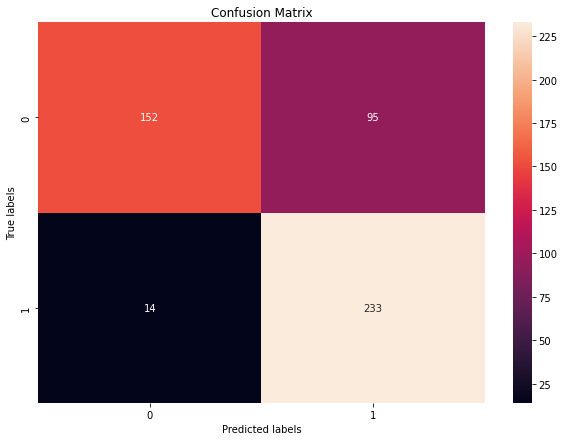

In [40]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d")

plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")

plt.show()

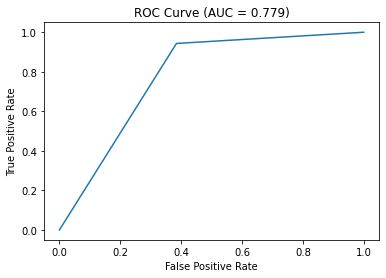

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.3f})'.format(auc))
plt.show()

# SUPPORT VECTOR MACHINE

Linear

In [53]:
from sklearn import svm

clf = svm.SVC(kernel='linear')

clf.fit(x_sm, y_sm)

y_pred = clf.predict(x_test)

# Evaluate the performance of the model
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.708502024291498
Classification report:
               precision    recall  f1-score   support

         0.0       0.64      0.98      0.77       247
         1.0       0.96      0.44      0.60       247

    accuracy                           0.71       494
   macro avg       0.80      0.71      0.69       494
weighted avg       0.80      0.71      0.69       494



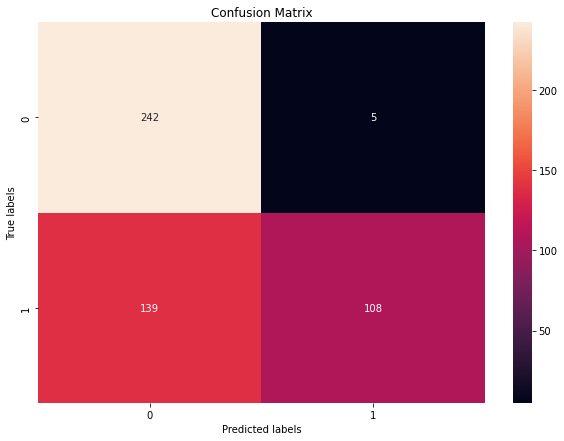

In [54]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d")

plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")

plt.show()

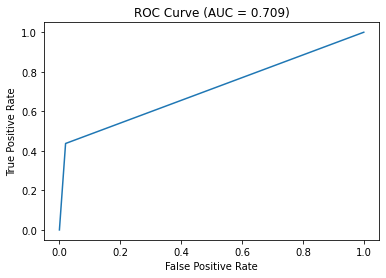

In [45]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.3f})'.format(auc))
plt.show()

Gaussian SVM

In [55]:
clf = svm.SVC(kernel='rbf')

clf.fit(x_sm, y_sm)

y_pred = clf.predict(x_test)

# Evaluate the performance of the model
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.46963562753036436
Classification report:
               precision    recall  f1-score   support

         0.0       0.48      0.63      0.54       247
         1.0       0.46      0.31      0.37       247

    accuracy                           0.47       494
   macro avg       0.47      0.47      0.46       494
weighted avg       0.47      0.47      0.46       494



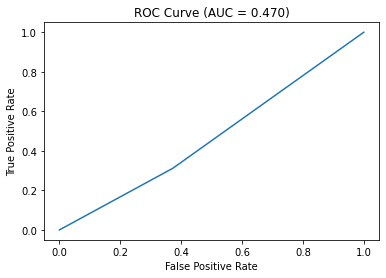

In [56]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.3f})'.format(auc))
plt.show()

Cubic SVM

In [57]:
clf = svm.SVC(kernel='poly', degree = 3)

clf.fit(x_sm, y_sm)

y_pred = clf.predict(x_test)

# Evaluate the performance of the model
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.5040485829959515
Classification report:
               precision    recall  f1-score   support

         0.0       0.50      0.77      0.61       247
         1.0       0.51      0.24      0.33       247

    accuracy                           0.50       494
   macro avg       0.51      0.50      0.47       494
weighted avg       0.51      0.50      0.47       494



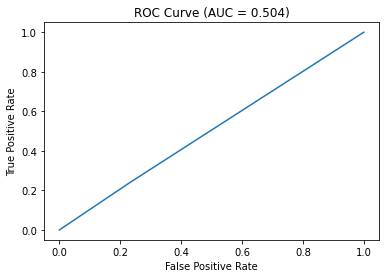

In [58]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.3f})'.format(auc))
plt.show()

In [59]:
clf = svm.SVC(kernel='sigmoid')

clf.fit(x_sm, y_sm)

y_pred = clf.predict(x_test)

# Evaluate the performance of the model
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.4777327935222672
Classification report:
               precision    recall  f1-score   support

         0.0       0.48      0.43      0.45       247
         1.0       0.48      0.52      0.50       247

    accuracy                           0.48       494
   macro avg       0.48      0.48      0.48       494
weighted avg       0.48      0.48      0.48       494



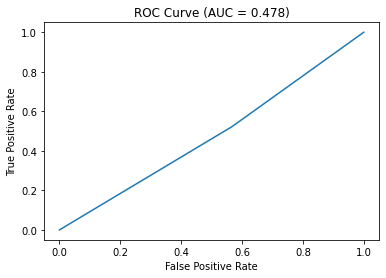

In [60]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.3f})'.format(auc))
plt.show()